# Multiple Linear Regression

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read data function. I use example dataset from Wikipedia.

In [2]:
def read_data(filename):
    return pd.read_csv(filename)

Design matrix function.

In [3]:
def design_matrix(x):
    return np.insert(x, 0, np.ones(x.shape[0]), axis=1)

Read dataset and make train and test sets.

In [4]:
df = read_data('datasets/example_2.csv')

ci = int(len(df) * 0.8)

x_train = np.mat(df.iloc[:,[0, 1, 2, 3, 4, 5]][:ci])
y_train = np.mat(df.iloc[:,[6]][:ci])

x_test = np.mat(df.iloc[:,[0, 1, 2, 3, 4, 5]][ci:])
y_test = np.mat(df.iloc[:,[6]][ci:])

Initialize vector of parameters w with b as first w<sub>0</sub> parameter. Read data from `dataset.csv` file.

In [5]:
X = design_matrix(x_train)
w = np.linalg.inv(X.T @ X) @ X.T @ y_train

Plot our model and predicted values.

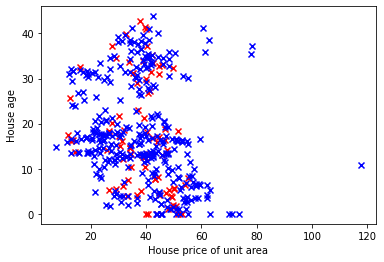

In [6]:
y = np.sum(design_matrix(x_test) * w, axis=1)

plt.scatter(np.array(y.T).flatten(), np.array(x_test[:,1].T, ).flatten(), marker='x', c='red')
plt.scatter(np.array(y_train.T).flatten(), np.array(x_train[:,1].T).flatten(), marker='x', c='blue')

plt.ylabel('House age')
plt.xlabel('House price of unit area')

plt.show()

Count total average error on test set.

In [7]:
X_test = np.insert(x_test, 0, np.ones(x_test.shape[0]), axis=1)
y = np.sum(X_test * w, axis=1)
f'Average error value {np.abs(y - y_test).mean()}'

'Average error value 5.847764994904371'